## Data Overview
Data Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Attributes can be grouped into
### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## Import libraries and read data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
data=pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
#Drop missing values
data=data.dropna()
len(data)

2216

## Feature Engineering

#### Days and months since customer registered

In [7]:
#Days since customer registered
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"], format='mixed')
dates=[]
for i in data["Dt_Customer"]:
    i=i.date()
    dates.append(i)

In [8]:
data['Months_Customer'] = 12.0 * (2015 - data.Dt_Customer.dt.year ) + (1 - data.Dt_Customer.dt.month)

In [9]:
data['Months_Customer']

0       33.0
1        5.0
2       17.0
3        3.0
4       12.0
        ... 
2235    19.0
2236     3.0
2237    12.0
2238    12.0
2239    27.0
Name: Months_Customer, Length: 2216, dtype: float64

In [10]:
days=[]
for i in dates:
    days.append(max(dates)-i)
# data["Customer_for"]=days
# data["Customer_for"]=pd.to_numeric(data["Customer_for"], errors="coerce")

In [11]:
# data["Customer_for"]=days
# data["Customer_for"]=pd.to_numeric(data["Customer_for"], errors="coerce")

### Customer's Age

In [12]:
#Customer's age
data['Age']=2015-data["Year_Birth"]

In [13]:
data['Age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2216, dtype: int64

In [14]:
data['Age'].describe()

count    2216.000000
mean       46.179603
std        11.985554
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Age, dtype: float64

#### Age group

In [15]:
data.loc[(data['Age']>=13) & (data['Age']<=19), 'AgeGroup']='Teen'
data.loc[(data['Age']>=20) & (data['Age']<=39), 'AgeGroup']='Adult'
data.loc[(data['Age']>=40) & (data['Age']<=59), 'AgeGroup']='Middle Age Adult'
data.loc[(data['Age']>=60), 'AgeGroup']='Senior Adult'

#### Total Spending

In [16]:
#Total Spending
data["TotalSpending"]=data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

#### Number of children

In [17]:
#Number of children
data["Children"]=data["Kidhome"]+data["Teenhome"]

#### Marital Status

In [18]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [19]:
#marital status
data["Marital_Status"]=data["Marital_Status"].replace({'Together': 'Partner',
                                                       'Married': 'Partner',
                                                       'Single': 'Single',
                                                       'Divorced': 'Single',
                                                       'Widow': 'Single',
                                                       'Alone': 'Single',
                                                       'Absurd': 'Single',
                                                       'YOLO': 'Single'})

In [20]:
# drop_col=["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
# data=data.drop(drop_col, axis=1)

#### Remove outliers: age and income

Text(0, 0.5, 'Age')

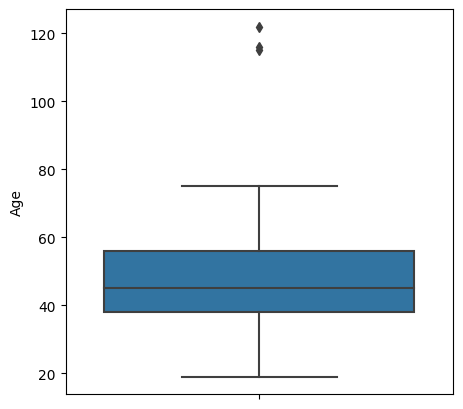

In [21]:
#outliers of Age
plt.figure(figsize=(5, 5))
sns.boxplot(y=data["Age"])
plt.ylabel("Age")

Text(0, 0.5, 'Income')

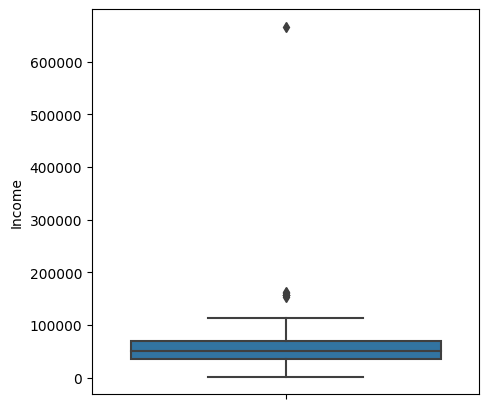

In [22]:
#Outliers of Income
plt.figure(figsize=(5, 5))
sns.boxplot(y=data["Income"])
plt.ylabel("Income")

In [23]:
data["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [24]:
#Remove outliers
data=data[data["Age"]<100]
data=data[data["Income"]<120000]

In [56]:
data["Income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

## Exploratory Data Analysis

#### Education

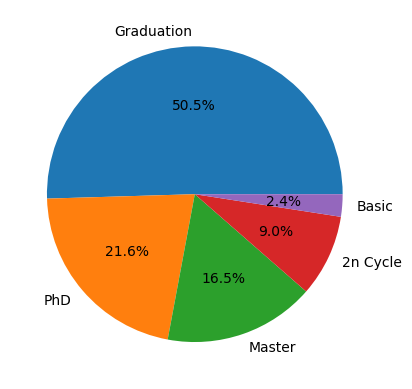

In [54]:
education=data["Education"].value_counts()
fig=plt.pie(education, labels=education.index, autopct='%1.1f%%')

#### Marital Status and Spendings

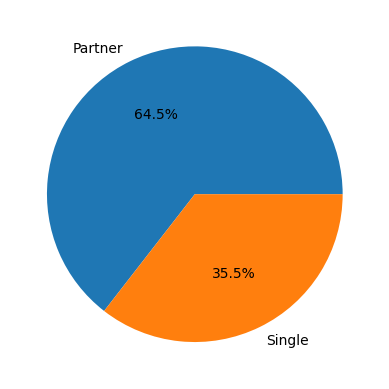

In [25]:
#Marital status
marital_status=data["Marital_Status"].value_counts()
fig=plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')

<AxesSubplot: xlabel='Marital_Status', ylabel='TotalSpending'>

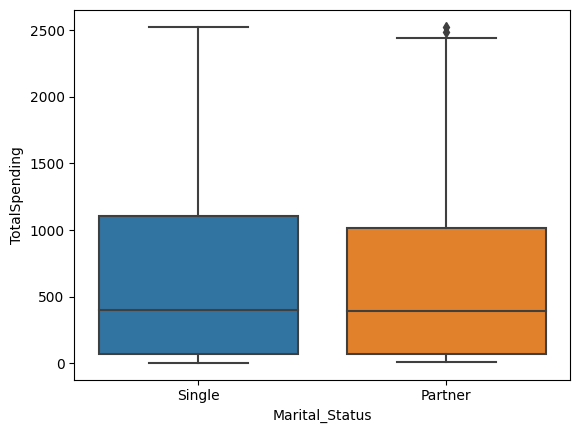

In [26]:
#Total spending by marital status
sns.boxplot(x="Marital_Status", y="TotalSpending", data=data)

Text(0, 0.5, 'Average Spending')

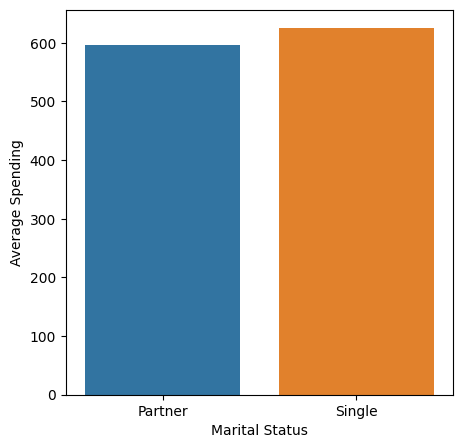

In [27]:
#Average spending by marital status
marital_spending=data.groupby("Marital_Status")["TotalSpending"].mean()
marital_spending_df = pd.DataFrame(list(marital_spending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(5,5))
sns.barplot(data=marital_spending_df,  x="Marital Status", y="Average Spending");
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')

#### Insights:
In avergae, those who are single spend slightly more than those who live with partner.

#### Number of children and Spendings

In [28]:
data["Children"].value_counts()

Children
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

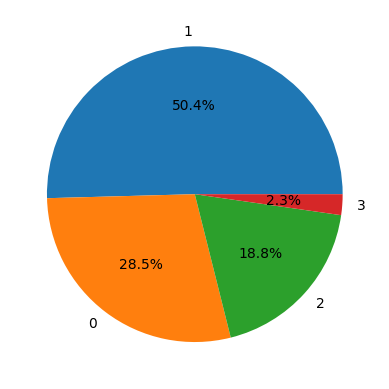

In [29]:
#Number of children
num_children=data["Children"].value_counts()
fig=plt.pie(num_children, labels=num_children.index, autopct='%1.1f%%')

Text(0, 0.5, 'Average Spending')

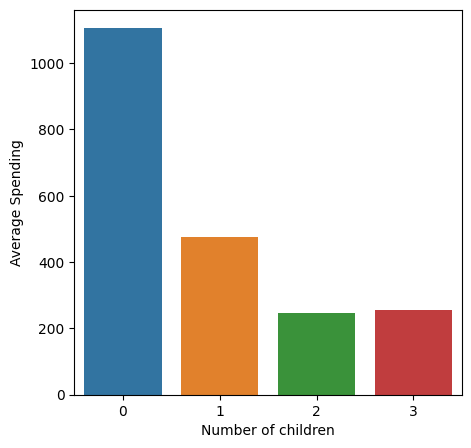

In [30]:
#Average spending
children_spending=data.groupby("Children")["TotalSpending"].mean()
children_spending_df = pd.DataFrame(list(children_spending.items()), columns=['Number of children', 'Average Spending'])

plt.figure(figsize=(5,5))
sns.barplot(data=children_spending_df,  x="Number of children", y="Average Spending");
plt.xlabel('Number of children')
plt.ylabel('Average Spending')

#### Insights
* Those who don't have children spend more than those who have children in average
* Those who has 1 child spend more than those who have 2 or 3 children in average
* Those who have 2 or 3 children spend approximately the same in average.

#### Income and Spendings

c:\Users\dinhm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Counts')

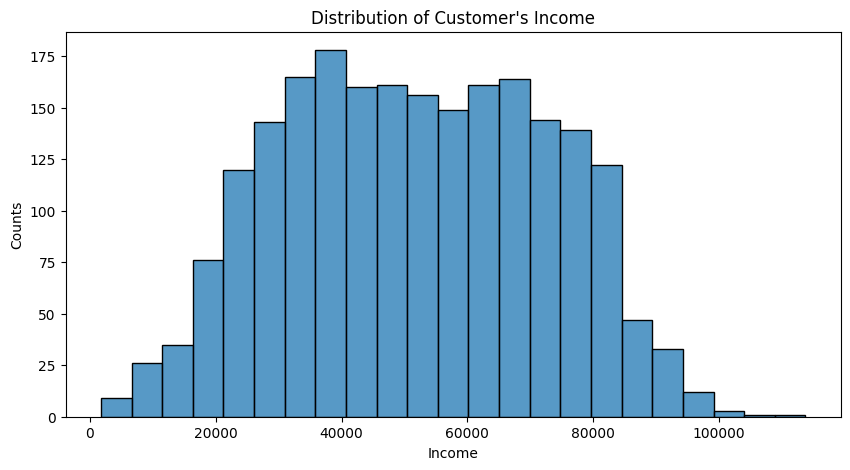

In [31]:
#Income
plt.figure(figsize=(10, 5))
ax=sns.histplot(data=data["Income"])
ax.set(title="Distribution of Customer's Income")
plt.xlabel("Income")
plt.ylabel("Counts")

Text(0, 0.5, 'Spendings')

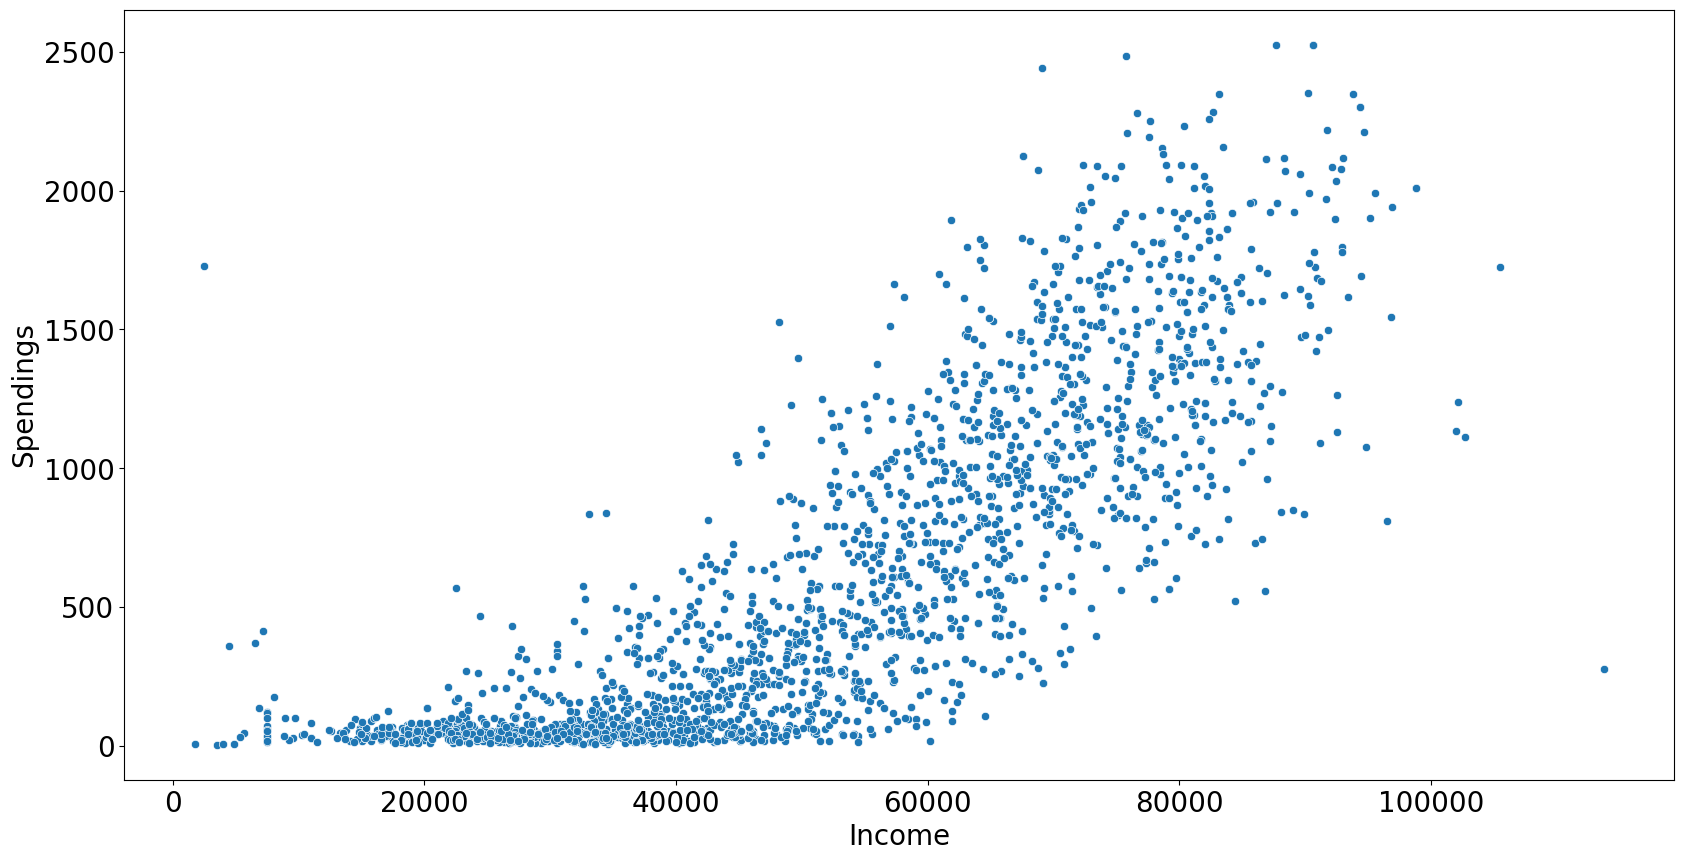

In [32]:
#Income vs spending
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data["Income"], y=data["TotalSpending"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Spendings", fontsize=20)

#### Insights:
The higher the customer's income, the more he or she spends

#### Age and Total Spendings

c:\Users\dinhm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Counts')

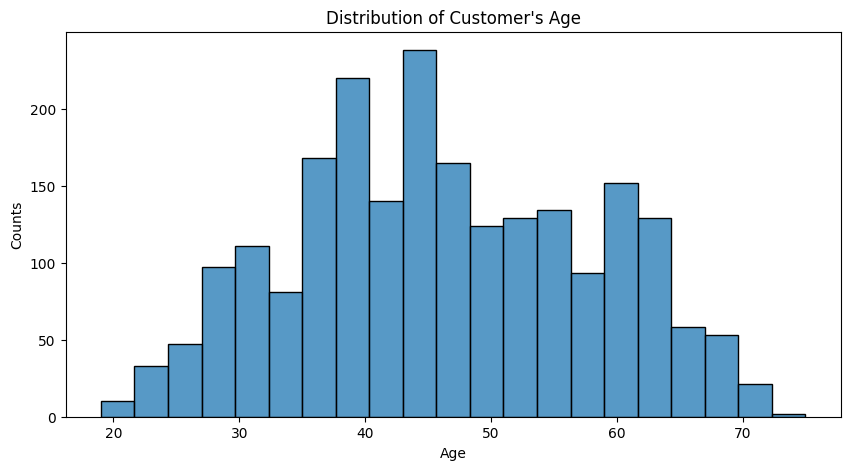

In [33]:
#Age
plt.figure(figsize=(10, 5))
ax=sns.histplot(data=data["Age"])
ax.set(title="Distribution of Customer's Age")
plt.xlabel("Age")
plt.ylabel("Counts")

Text(0, 0.5, 'Spendings')

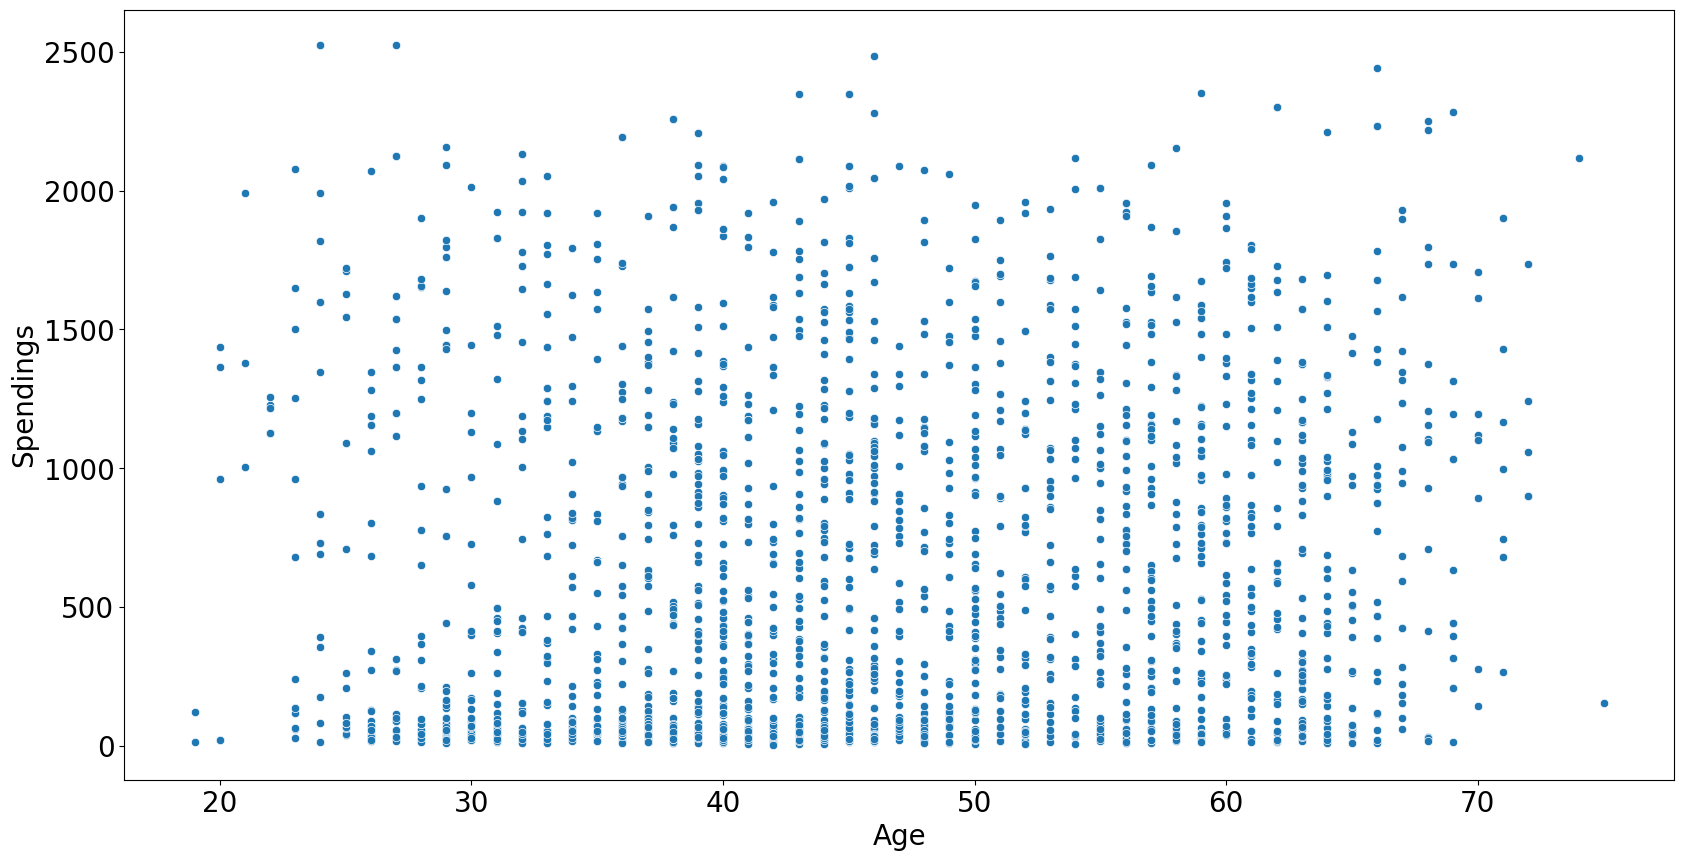

In [34]:
#Age vs spending
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data["Age"], y=data["TotalSpending"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Spendings", fontsize=20)

#### Insights
Age and total spendings don't have much correlation

#### Age Group and Spendings

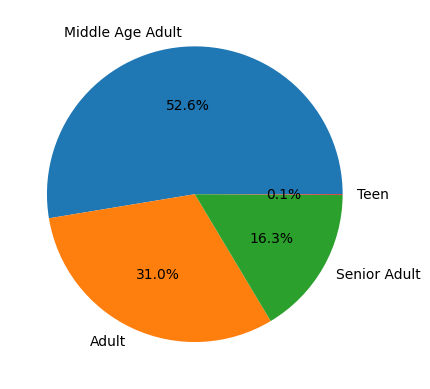

In [35]:
#Age Group
age_group=data["AgeGroup"].value_counts()
fig=plt.pie(age_group, labels=age_group.index, autopct='%1.1f%%')

#### Insights
* More than 50% of customers are middle age adults (40 - 59 years old: 52.6%)
* The second largest group of customers is adult group (20 - 39 years old: 31%)
* 16.3% of customers are senior adults (60 years old or older)
* Only 0.1% of customers are teens (13 - 19 years old)

Text(0, 0.5, 'Average Spending')

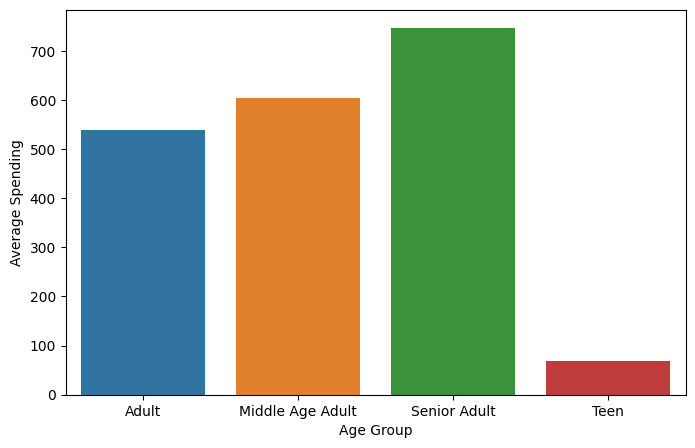

In [36]:
# Age Group vs Average Spending
agegroup_spending=data.groupby("AgeGroup")["TotalSpending"].mean()
agegroup_spending_df = pd.DataFrame(list(agegroup_spending.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(8, 5))
sns.barplot(data=agegroup_spending_df,  x="Age Group", y="Average Spending")
plt.xlabel('Age Group')
plt.ylabel('Average Spending')

In [37]:
agegroup_spending_df

,Age Group,Average Spending
0,Adult,539.083455
1,Middle Age Adult,604.308621
2,Senior Adult,746.422222
3,Teen,69.000000


#### Insights

* Senior adults spend the most (approximately $750 in average)
* 2nd highest average spending group: middle age adult (aproximately $604 in average)
* Adult group spends around $540 in average
* Teens spend $69 in average

## Segmentation

In [38]:
#Data used for clustering
#df_segment=data[["Income", "Age", "Customer_for", "TotalSpending", "Children"]]
X = data.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           2205 non-null   float64
 1   Months_Customer  2205 non-null   float64
 2   Age              2205 non-null   int64  
 3   TotalSpending    2205 non-null   int64  
 4   Children         2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 103.4 KB


## Elbow method

C:\Users\dinhm\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dinhm\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\dinhm\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\dinhm\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\dinhm\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1440,

Text(0, 0.5, 'Intertia')

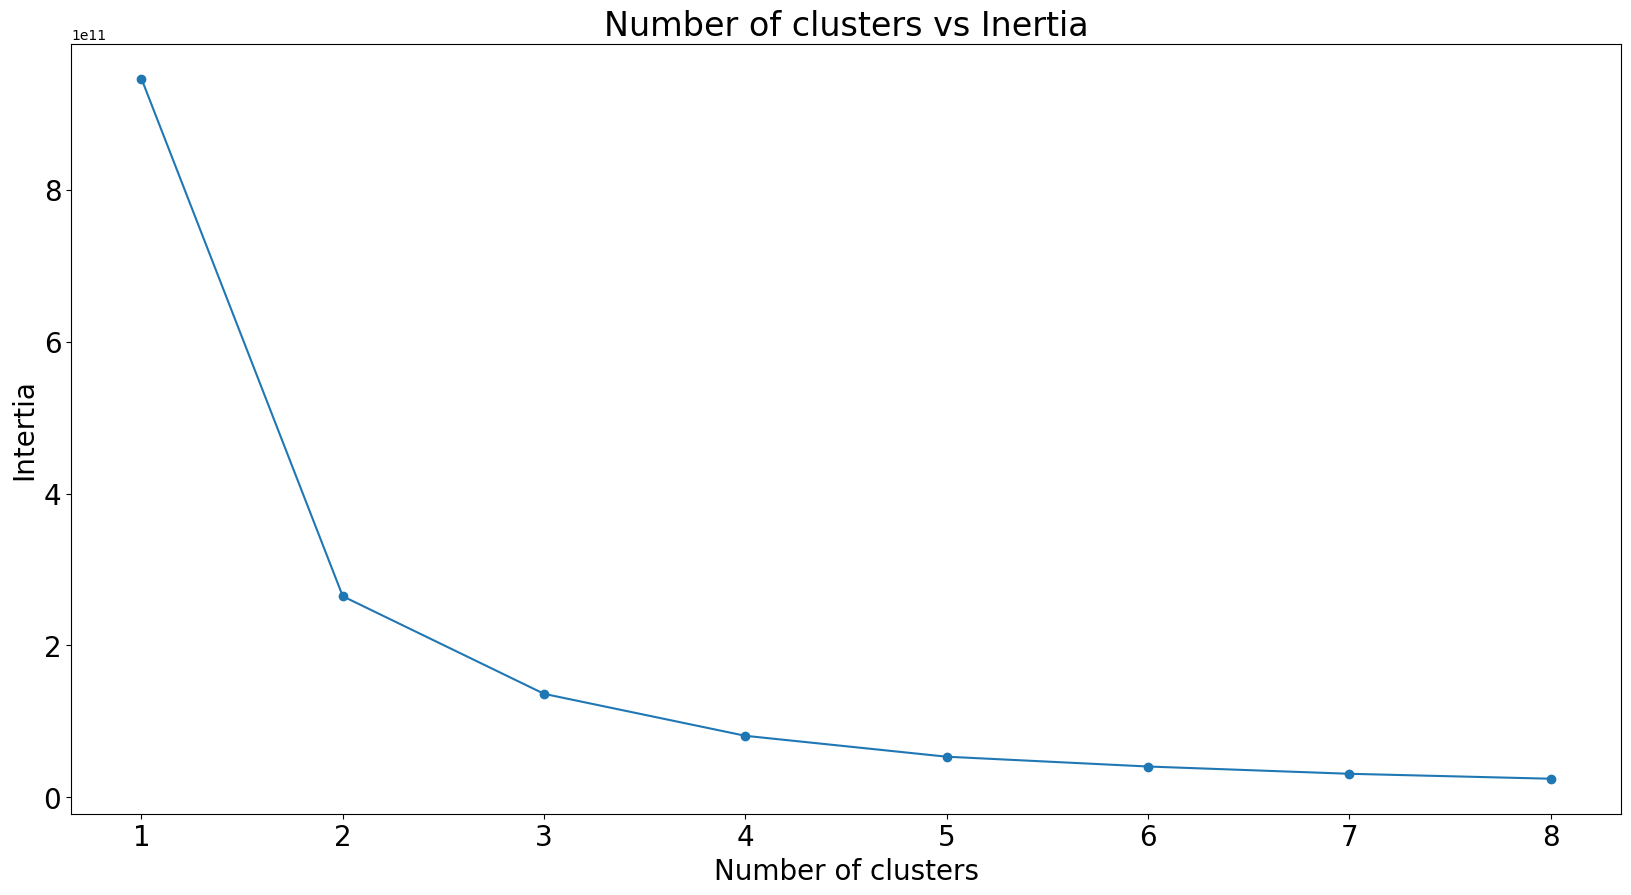

In [40]:
num_cluster=range(1, 9)
intertias=[]
for i in num_cluster:
    model=KMeans(i, random_state=42).fit(X)
    intertias.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.title("Number of clusters vs Inertia", fontsize=24)
plt.plot(num_cluster, intertias, '-o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Number of clusters", fontsize=20)
plt.ylabel("Intertia", fontsize=20)

From the elbow method, the optimal K is K=4. We will use K=4

In [41]:
model=KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)
pred=model.predict(X)
customer_kmeans=X.copy()
customer_kmeans['clusters']=pred

## Cluster profile

Text(0, 0.5, 'Income')

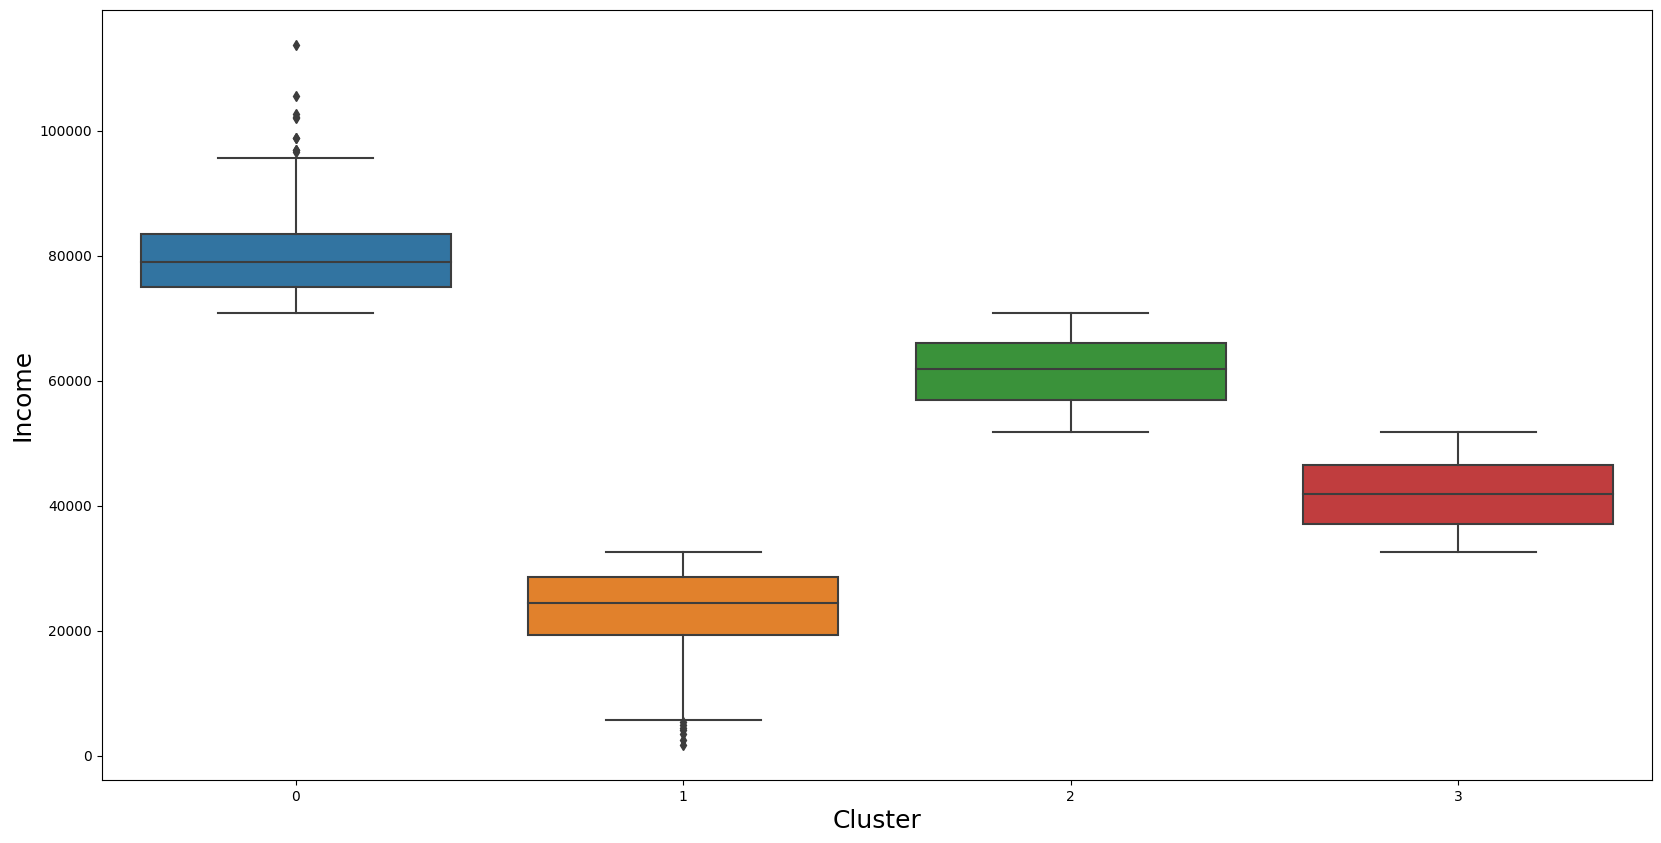

In [42]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=customer_kmeans, x='clusters', y='Income')
plt.xlabel("Cluster", fontsize=18)
plt.ylabel("Income", fontsize=18)

In [43]:
customer_kmeans

,Income,Months_Customer,Age,TotalSpending,Children,clusters
0,58138.0,33.0,58,1617,0,2
1,46344.0,5.0,61,27,2,3
2,71613.0,17.0,50,776,0,0
3,26646.0,3.0,31,53,1,1
4,58293.0,12.0,34,422,1,2
...,...,...,...,...,...,...
2235,61223.0,19.0,48,1341,1,2
2236,64014.0,3.0,69,444,3,2
2237,56981.0,12.0,34,1241,0,2
2238,69245.0,12.0,59,843,1,2


Text(0, 0.5, 'Spending')

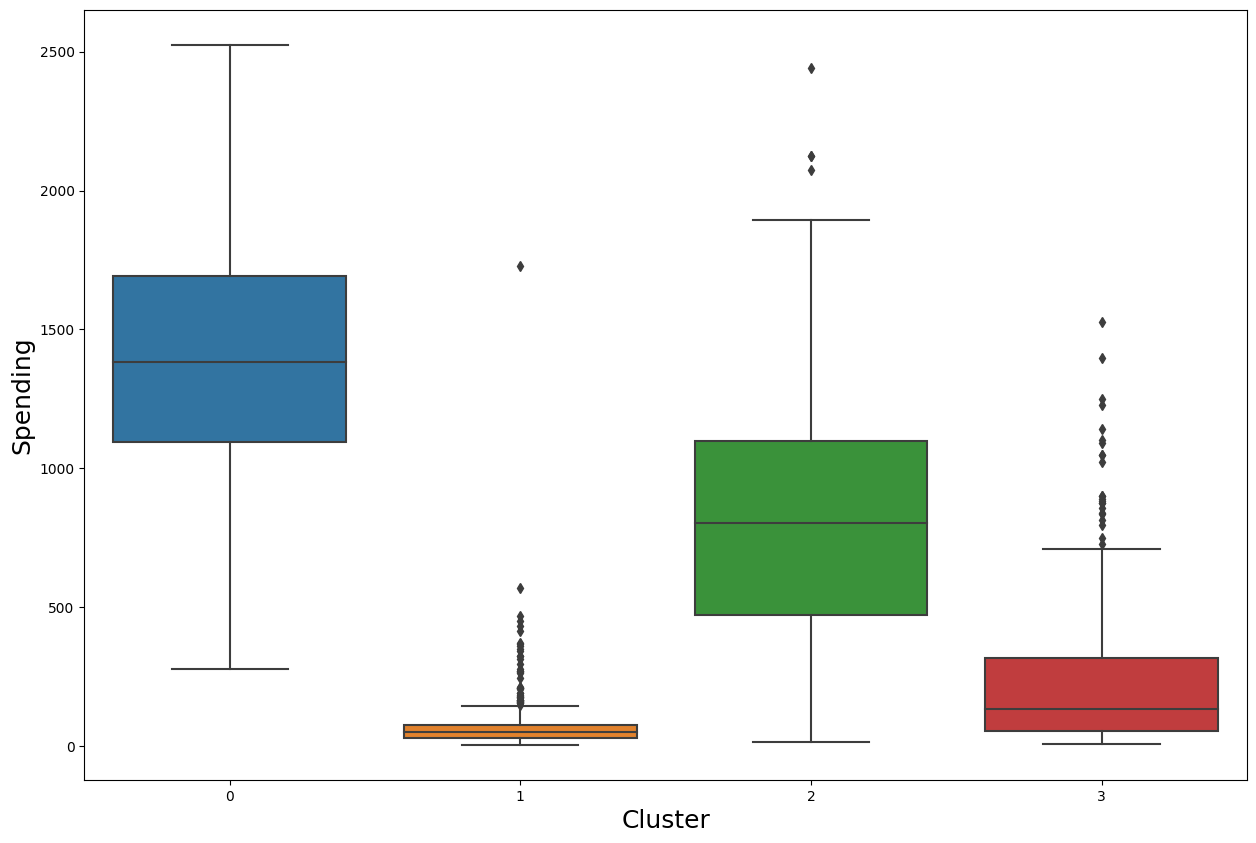

In [44]:
plt.figure(figsize=(15,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpending')
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Spending', fontsize=18)

Text(0, 0.5, 'Months since customer')

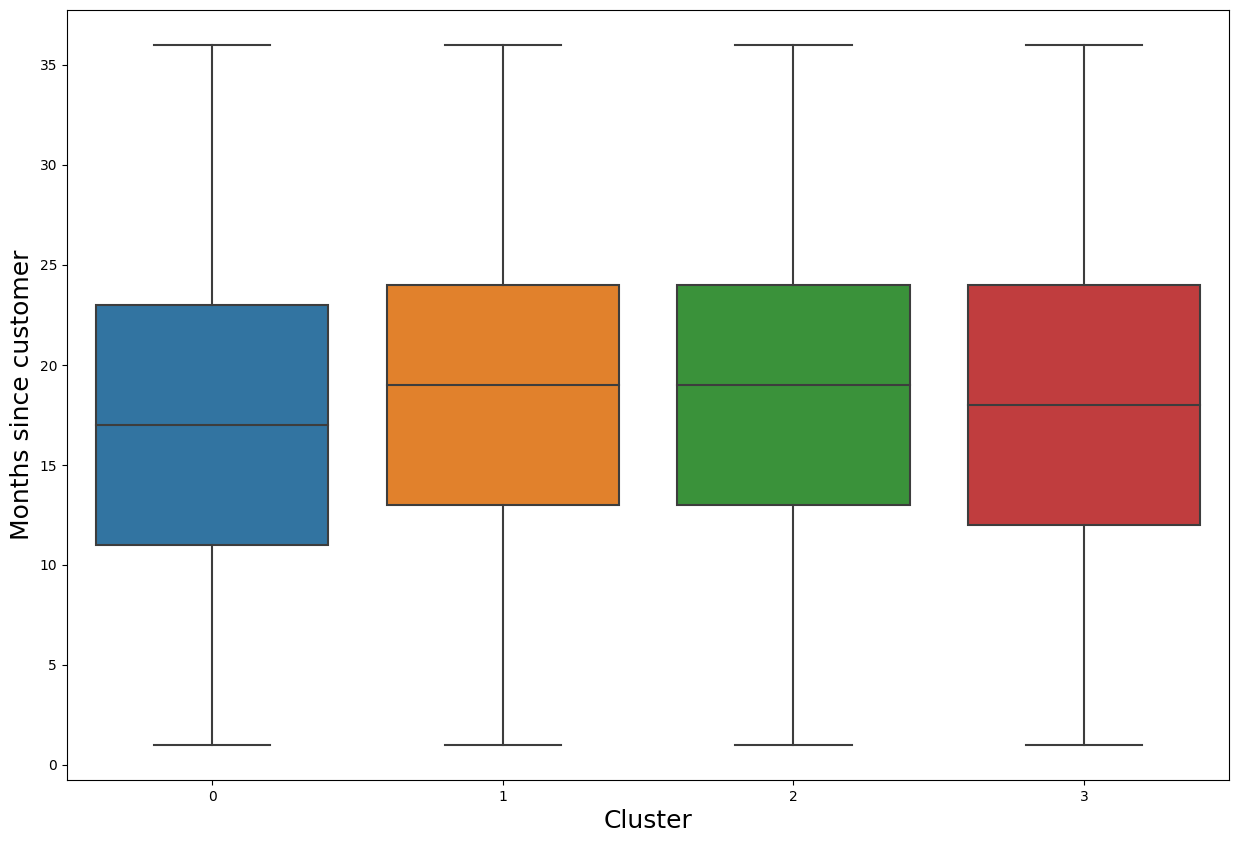

In [45]:
plt.figure(figsize=(15,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Months_Customer')
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Months since customer', fontsize=18)

Text(0, 0.5, 'Age')

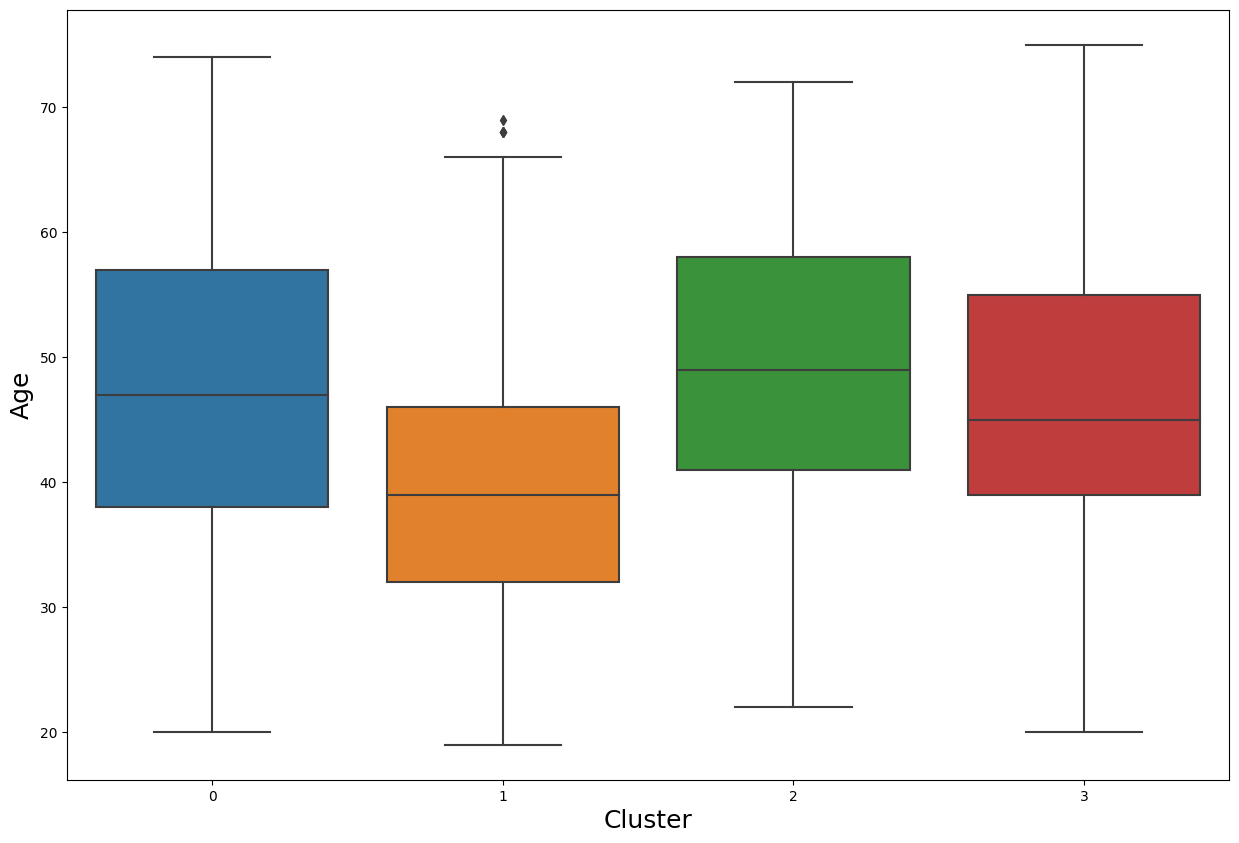

In [46]:
plt.figure(figsize=(15,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age')
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Age', fontsize=18)

Text(0, 0.5, 'Number of children')

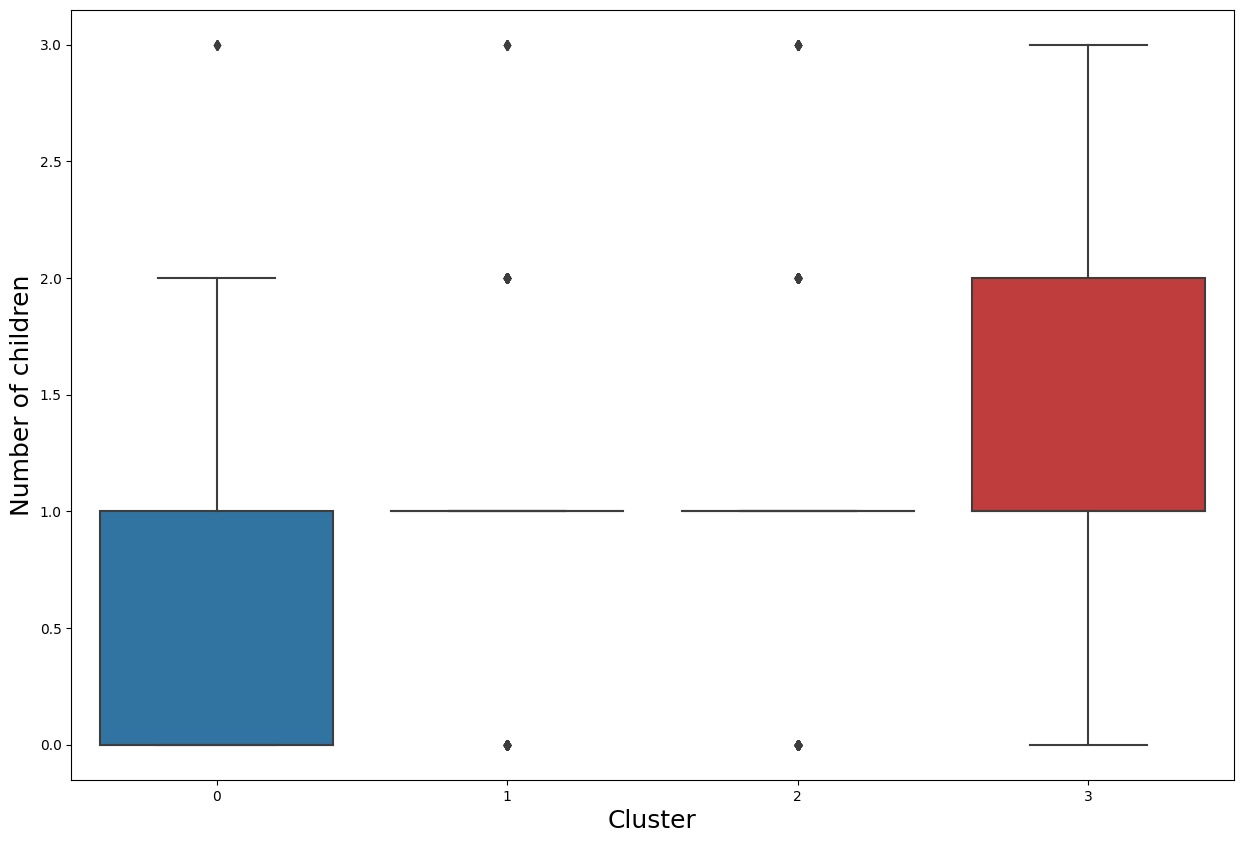

In [47]:
plt.figure(figsize=(15,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children')
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Number of children', fontsize=18)

Based on the cluster analysis above, we can divide customers into 4 groups:
* Platinum: Highest income and highest spending
* Gold: High income and high spending
* Silver: Low income and low spending
* Bronze: Lowest income and lowest spending

#### Explore cluster data

In [48]:
customer_kmeans["clusters"]=customer_kmeans["clusters"].replace({0: "Platinum",
                                                                 1: "Bronze",
                                                                 2: "Gold",
                                                                 3: "Silver"})
data['clusters'] = customer_kmeans.clusters

#### Customers Distribution

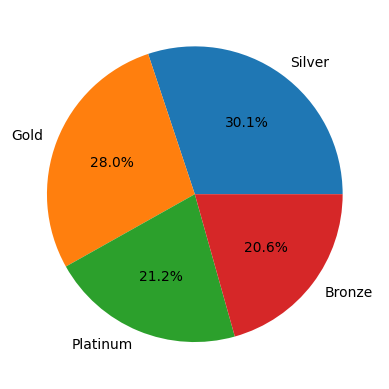

In [49]:
# customers distribution based on clusters
clusters_count=data['clusters'].value_counts()
fig=plt.pie(clusters_count, labels=clusters_count.index, autopct='%1.1f%%')

Insights:
* Most of the customers are in Silver and Gold groups, which are 30.1% and 28% accordingly
* Platinum is the 3rd popular group (21.2%), and only 21.2% of customers are in Bronze group.

#### Income and Spending based on clusters

Text(0, 0.5, 'Spendings')

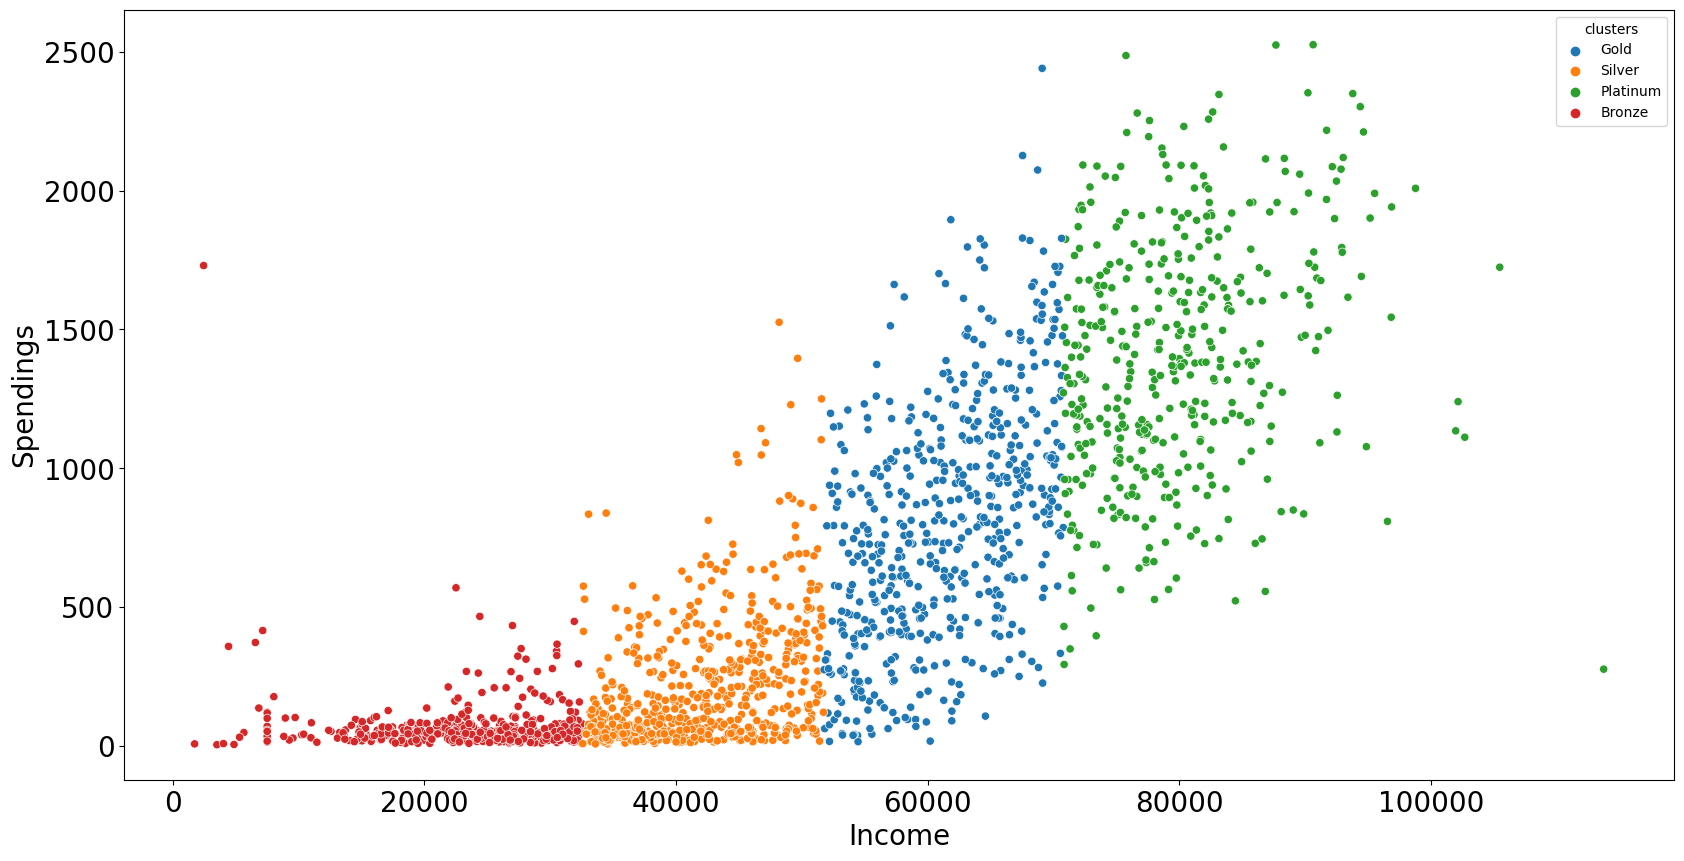

In [50]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data, x=data["Income"], y=data["TotalSpending"], hue="clusters")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Spendings", fontsize=20)

Insight:

We can easily see that customers with high income will spend more, which is exactly as the clusters' characteristics.

#### Spending habits by cluster

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

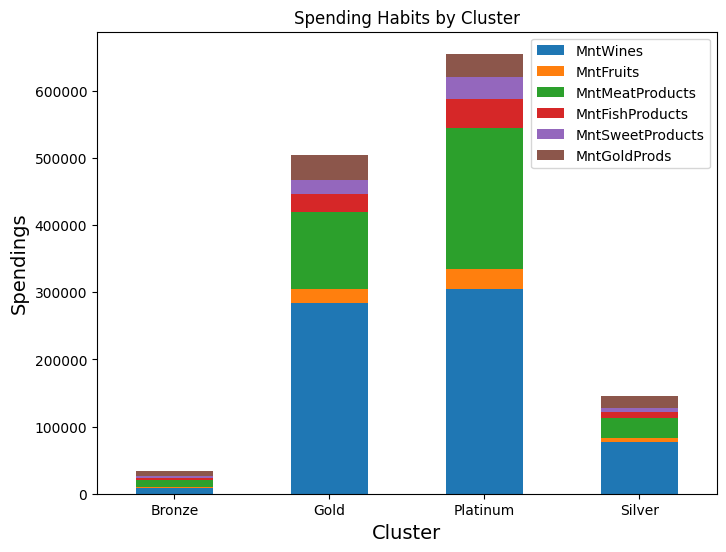

In [51]:
# We will visualize products bought by customer in each cluster to see their spending habits
cluster_spending_habit=data.groupby('clusters')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
cluster_spending_habit.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title("Spending Habits by Cluster")
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Spendings", fontsize=14)
plt.xticks(rotation=0, ha="center")

Insights:

Customers in all clusters spend most on wines and meat products

#### Purchasing habits by cluster

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

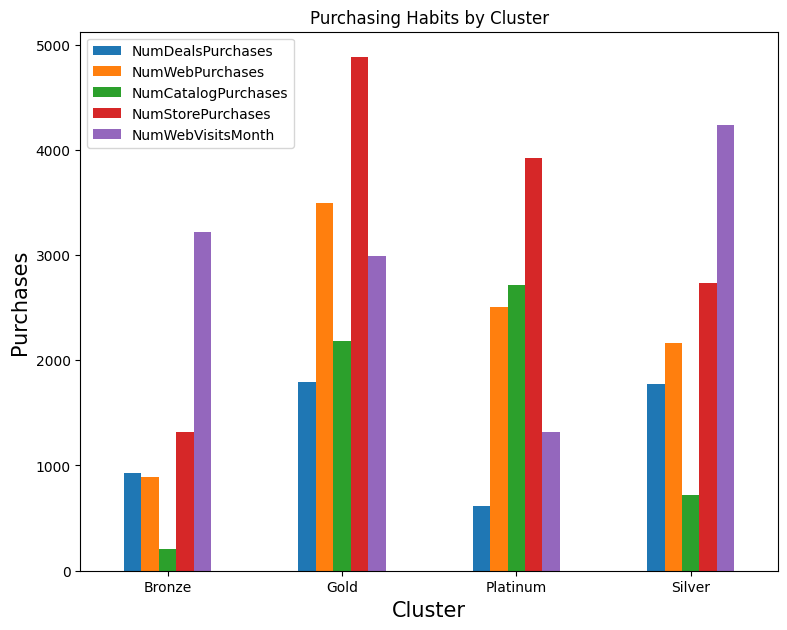

In [52]:
cluster_purchase=data.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()
cluster_purchase.plot(kind='bar', figsize=(9,7))

plt.title("Purchasing Habits by Cluster")
plt.xlabel("Cluster", fontsize=15)
plt.ylabel("Purchases", fontsize=15)
plt.xticks(rotation=0, ha="center")

Insights
* Platinum and Gold customers are more likely to buy products in store than other groups
* Most web and catalog purchases are made by Platinum and Gold customers
* Deal Purchases are common in Gold and Silver groups
* Silver has the highest web visits while Bronze has the lowest web visits
* Silver customers tend to purchase in store
* Bronze customers are most likely to purchase in store, but overall don't buy much compared to web visits

#### Promotions acceptance by cluster

Text(0, 0.5, 'Promotion Counts')

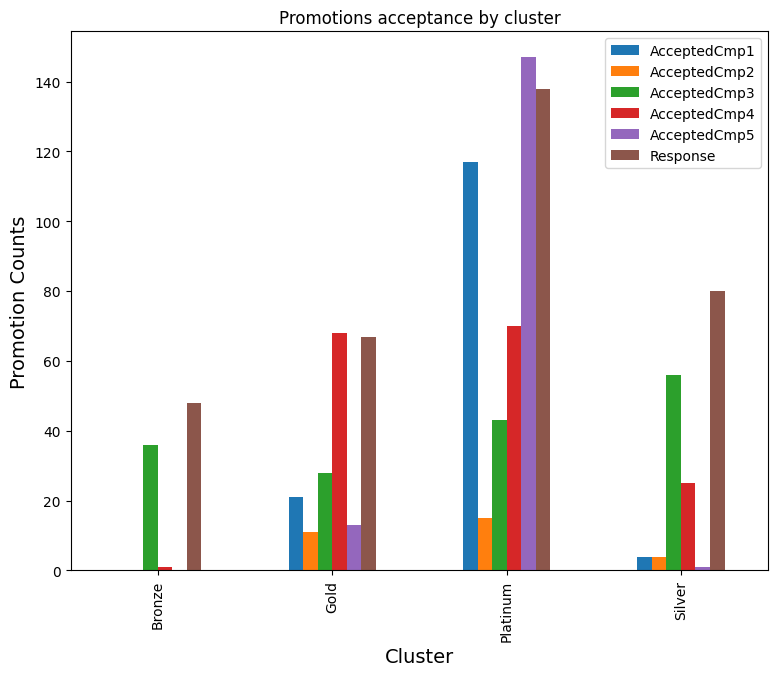

In [53]:
cluster_campaign=data.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()
cluster_campaign.plot(kind='bar', figsize=(9, 7))
plt.title("Promotions acceptance by cluster")
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Promotion Counts", fontsize=14)


Insights:
* Bronze customers don't accept as many promotion offers as other groups of customers. Most of them accept offers in the 3rd and last campaigns.
* All customers accept offers in the last campaign. Silver customers accept most offers in the last campaign
* Platinum customers accept most offers in the 5th campaign.
* Gold customers accept most offers in the 4th campaign.

### Conclusion

Customers' statistical characteristics:
* 50.5% of customers are college graduates
* Most customers live with partners (64.5%)
* Singles spend more than those who live with partners
* Most customers have only 1 child (50.4%)
* Middle age adults (40 - 59 years old) is the most popular age group (52.6%)

Customers' purchasing habits:
* Senior adults spend more than other groups in average (approximately $750 in average)
* Those who don't have children tend to spend more in average
* Most customers' income are from $35,196 to $68,281 (Q1 to Q3)
* Wine and meat products are popular items purchased by customers
* Based on income and spendings, customers are divided into 4 clusters, which are Platinum, Gold, Silver and Bronze
* Most customers are in Silver and Gold groups
* The more customers earn, the more they spend
* Most customers like to buy products in store and then online. Platinum and Gold groups like to buy products in store, while Bronze and Silver customers like to buy products online more than other types of purchasing
* Platinum customers are most interested in promotion offers, while Bronze customers aren't interested in many promotion offers.

### Recommendations:

Products that need more marketing:
* Sweet and Fruit products need effective marketing stratergies since these are the two least purchased types of products. The store needs to promote these products to increase the revenue from these products. For example, the store can combine the least selling products with best-selling products as a promotion.

Marketing recommendation:
* Provide coupons to customer groups with high spendings to encourage customers to purchase.
* Market low-priced products to customers group with lower income and spendings
* Online shopping has potential, so the store can offer special discounts for online shopping or customers who have accounts